<a href="https://colab.research.google.com/github/HyuntaePark/Statistics_Classification/blob/main/Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:6 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Ign:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:8 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:9 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:14 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:15 http://ppa.launchpad.net/graph

In [3]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [4]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

mecab-ko is already installed
mecab-ko-dic is already installed
mecab-python is already installed
Done.
Processing /tmp/mecab-python-0.996
  Created wheel for mecab-python: filename=mecab_python-0.996_ko_0.9.2-cp37-cp37m-linux_x86_64.whl size=141815 sha256=198a172c1f9360af313bacd972020b740da60ba915672a2e9a8357c4e5fddd8a
  Stored in directory: /root/.cache/pip/wheels/40/7b/9f/2922869bef86c3354ae7034f7a3647c573ee1997c2dad0290a
Failed to build mecab-python
  Attempting uninstall: mecab-python
    Found existing installation: mecab-python 0.996-ko-0.9.2
    Uninstalling mecab-python-0.996-ko-0.9.2:
      Successfully uninstalled mecab-python-0.996-ko-0.9.2
    Running setup.py install for mecab-python: started
    Running setup.py install for mecab-python: finished with status 'done'


  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  DEPRECATION: mecab-python was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/issues/8368.


In [5]:
import konlpy
from konlpy.tag import Kkma, Komoran, Hannanum, Okt
from konlpy.utils import pprint
from konlpy.tag import Mecab

In [6]:
mecab = Mecab()
sentence = "안녕하세요 저는 천재입니다."
temp_X = mecab.morphs(sentence)
temp_X

['안녕', '하', '세요', '저', '는', '천재', '입니다', '.']

In [7]:
import pandas as pd
import re

In [8]:
!pip3 install torch
!pip3 install torchvision

In [9]:
import torch

In [10]:
df_raw = pd.read_csv('/content/drive/MyDrive/text_digit_1.csv')
df_raw.head()

,text_total,digit_1
0,카센터에서 자동차부분정비 타이어오일교환,S
1,상점내에서 일반인을 대상으로 채소.과일판매,G
2,절단하여사업체에도매 공업용고무를가지고 합성고무도매,G
3,영업점에서 일반소비자에게 열쇠잠금장치,G
4,어린이집 보호자의 위탁을 받아 취학전아동보육,Q


In [11]:
df_raw['digit_1'].unique()

array(['S', 'G', 'Q', 'C', 'I', 'O', 'F', 'P', 'H', 'N', 'R', 'M', 'J',
       'L', 'B', 'K', 'E', 'D', 'A'], dtype=object)

In [12]:
df_raw.nunique()

text_total    697079
digit_1           19
dtype: int64

In [13]:
df_raw_test = pd.read_csv('/content/drive/MyDrive/text_digit_1_test.csv')
df_raw_test.head()

,text_total,digit_1
0,치킨전문점에서 고객의주문에의해 치킨판매,NaN
1,산업공구 다른 소매업자에게 철물 수공구,NaN
2,절에서 신도을 대상으로 불교단체운영,NaN
3,영업장에서 고객요구로 자동차튜닝,NaN
4,"실내포장마차에서 접객시설을 갖추고 소주,맥주제공",NaN


In [14]:
from torchtext.legacy import data 

tokenizer = Mecab()

In [15]:
def get_length(title):
    return len(title)

df_raw['text_total_len'] = df_raw['text_total'].apply(get_length)

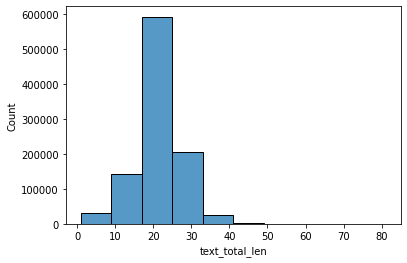

In [16]:
import seaborn as sns
import numpy as np 


np.median(df_raw['text_total_len'].to_list())
np.max(df_raw['text_total_len'].to_list())

sns.histplot(df_raw['text_total_len'],bins = 10)

In [17]:
# 필드 정의
from torchtext.legacy import data 

# 실제 사용은 하지 않을 예정
INDEX = data.Field(sequential = False,
                use_vocab = False)

TITLE = data.Field(sequential=True,
                  use_vocab=True,
                  tokenize=tokenizer.morphs, # 토크나이저로는 Okt 사용.
                  lower=True,
                  batch_first=True,
                  fix_length=44)

LABEL = data.Field(sequential=False,
                   use_vocab=True,
                   is_target=True)

In [18]:
from sklearn.model_selection import StratifiedKFold
from keras.utils import np_utils


skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42)

for i,(trn_idx,val_idx) in enumerate(skf.split(df_raw['text_total'],df_raw['digit_1'])):
    trn = df_raw.iloc[trn_idx]
    val = df_raw.iloc[val_idx]

In [19]:
trn.to_csv('/content/drive/MyDrive/trn.csv',index = False, encoding= 'utf-8-sig')
val.to_csv('/content/drive/MyDrive/val.csv',index = False, encoding= 'utf-8-sig')

In [20]:
#테스트 csv파일 초기화 및 저장
df_raw_test['digit_1'] = 0
df_raw_test.to_csv('/content/drive/MyDrive/test.csv',index = False)

In [21]:
from torchtext.legacy.data import TabularDataset

train_data, validation_data,test_data =TabularDataset.splits(
     path='/content/drive/MyDrive/', train='trn.csv',validation= 'val.csv', test='test.csv', format='csv',
        fields=[('text_total', TITLE), ('digit_1', LABEL)], skip_header=True)

In [22]:
print('훈련 샘플의 개수 : {}'.format(len(train_data)))
print('검증 샘플의 개수 : {}'.format(len(validation_data)))
print('테스트 샘플의 개수 : {}'.format(len(test_data)))

훈련 샘플의 개수 : 800000
검증 샘플의 개수 : 200000
테스트 샘플의 개수 : 100000


In [23]:
TITLE.build_vocab(train_data, min_freq = 2, max_size = 20000)

In [24]:
LABEL.build_vocab(train_data)

In [25]:
print('단어 집합의 크기 : {}'.format(len(TITLE.vocab)))

단어 집합의 크기 : 19861


데이터 로더 만들기

In [26]:
from torchtext.legacy.data import Iterator

In [27]:
# 하이퍼파라미터
batch_size = 128
lr = 0.001
EPOCHS = 20

In [28]:
train_loader = Iterator(dataset = train_data, batch_size = batch_size)
val_loader = Iterator(dataset = validation_data, batch_size = batch_size)
test_loader = Iterator(dataset = test_data, batch_size = batch_size,shuffle = False)

In [29]:
print('훈련 데이터의 미니 배치 수 : {}'.format(len(train_loader)))
print('검증 데이터의 미니 배치 수 : {}'.format(len(val_loader)))
print('테스트 데이터의 미니 배치 수 : {}'.format(len(test_loader)))

훈련 데이터의 미니 배치 수 : 6250
검증 데이터의 미니 배치 수 : 1563
테스트 데이터의 미니 배치 수 : 782


LSTM 모델 구현

In [30]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchtext import data, datasets
import random

In [31]:
class Net(nn.Module):
    def __init__(self, n_layers, hidden_dim, n_vocab, embed_dim, n_classes, dropout_p=0.2):
        super(Net, self).__init__()
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim

        self.embed = nn.Embedding(n_vocab, embed_dim)
        self.dropout = nn.Dropout(dropout_p)
        self.lstm = nn.LSTM(embed_dim, self.hidden_dim,
                          num_layers=self.n_layers,
                          batch_first=True)
        self.out = nn.Linear(self.hidden_dim, n_classes)

    def forward(self, x):
        x = self.embed(x)
        x, (ho,co) = self.lstm(x)
        h_t = x[:,-1,:] # 모든 문장을 거쳐서 나온 가장 마지막 단어의 출력 값
        self.dropout(h_t)
        logit = self.out(h_t)  # (배치 크기, 은닉 상태의 크기) -> (배치 크기, 출력층의 크기)
        return logit

    def _init_state(self, batch_size=1):
        weight = next(self.parameters()).data
        return weight.new(self.n_layers, batch_size, self.hidden_dim).zero_()

In [32]:
import numpy as np

def train(model, optimizer, train_iter):
    """모델 학습"""
    model.train()
    for i, batch in enumerate(train_iter):
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)

        optimizer.zero_grad()

        logit = model(x)
        y= torch.tensor(y,dtype = torch.long,device =DEVICE)

        loss = F.cross_entropy(logit,y)
        loss.backward()
        optimizer.step()

In [33]:
def evaluate(model, val_iter):
    """검증 데이터셋 평가"""
    model.eval()
    batch_cor, total_loss = 0, 0

    for batch in val_iter:
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)
        y= torch.tensor(y,dtype = torch.long,device =DEVICE)
        logit = model(x)

        loss = F.cross_entropy(logit, y)

        total_loss += loss.item()
        batch_cor += (logit.max(1)[1] == y.data).sum() 

    size = len(val_iter.dataset)
    avg_loss = total_loss / size 
    avg_accuracy = 100.0 * batch_cor / size


    return avg_loss, avg_accuracy

In [34]:
vocab_size = len(TITLE.vocab) 
n_classes = 20
print('단어 집합의 크기 : {}'.format(vocab_size))
print('클래스의 개수 : {}'.format(n_classes))

단어 집합의 크기 : 19861
클래스의 개수 : 20


In [35]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# DEVICE = torch.device("cpu")
model = Net(1, 8, vocab_size , 128, n_classes, 0.2).to(DEVICE)
optimizer = torch.optim.AdamW(model.parameters(), lr=lr)

In [36]:
best_val_loss = None
best_model = []

for e in range(1, EPOCHS + 1 ):
    train(model, optimizer, train_loader)
    val_loss, val_accuracy= evaluate(model, val_loader)

    print("[Epoch: %d] val loss : %5.5f | val accuracy : %5.2f" % (e, val_loss, val_accuracy))

    # 검증 오차가 가장 적은 최적의 모델을 저장
    if not best_val_loss or val_loss < best_val_loss:
        best_val_loss = val_loss
        best_model = model

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  


[Epoch: 1] val loss : 0.01786 | val accuracy : 24.65
[Epoch: 2] val loss : 0.01786 | val accuracy : 24.65
[Epoch: 3] val loss : 0.01786 | val accuracy : 24.65
[Epoch: 4] val loss : 0.01285 | val accuracy : 34.25
[Epoch: 5] val loss : 0.00178 | val accuracy : 94.74
[Epoch: 6] val loss : 0.00135 | val accuracy : 95.77
[Epoch: 7] val loss : 0.00121 | val accuracy : 96.16
[Epoch: 8] val loss : 0.00112 | val accuracy : 96.42
[Epoch: 9] val loss : 0.00106 | val accuracy : 96.58
[Epoch: 10] val loss : 0.00101 | val accuracy : 96.74
[Epoch: 11] val loss : 0.00098 | val accuracy : 96.84
[Epoch: 12] val loss : 0.00097 | val accuracy : 96.92
[Epoch: 13] val loss : 0.00095 | val accuracy : 96.93
[Epoch: 14] val loss : 0.00094 | val accuracy : 96.92
[Epoch: 15] val loss : 0.00095 | val accuracy : 96.94
[Epoch: 16] val loss : 0.00093 | val accuracy : 97.00
[Epoch: 17] val loss : 0.00094 | val accuracy : 96.98
[Epoch: 18] val loss : 0.00093 | val accuracy : 96.98
[Epoch: 19] val loss : 0.00094 | val 

In [38]:
def predict(model, test_iter):
    """학습된 모델로 정답 파일 예측"""
    model.eval()
    preds = []
    pred = []
    for batch in test_iter:
        x, y = batch.text_total.to(DEVICE), batch.digit_1.to(DEVICE)

        logit = model(x)
        pred=torch.argmax(logit,axis= 1).tolist()
        preds.extend(pred)
    return preds 

In [39]:
# bset model로 예측.
pred = predict(best_model,test_loader)
len(pred)

100000

In [40]:
print(pred)

[2, 1, 4, 4, 2, 3, 2, 3, 4, 4, 3, 4, 3, 8, 11, 4, 1, 1, 1, 11, 3, 4, 8, 4, 3, 4, 1, 7, 7, 10, 6, 1, 2, 3, 4, 2, 1, 13, 3, 8, 1, 3, 1, 2, 1, 5, 2, 1, 11, 1, 1, 1, 3, 1, 3, 4, 6, 3, 3, 3, 1, 3, 4, 16, 9, 4, 2, 4, 8, 1, 4, 7, 4, 4, 1, 6, 1, 4, 2, 10, 1, 2, 4, 1, 1, 10, 1, 4, 6, 4, 1, 1, 3, 3, 6, 8, 11, 1, 13, 9, 1, 1, 1, 1, 7, 11, 10, 4, 2, 8, 4, 8, 14, 4, 4, 9, 1, 1, 9, 11, 3, 3, 15, 1, 3, 2, 5, 13, 3, 4, 1, 15, 1, 2, 10, 4, 4, 1, 7, 6, 4, 1, 6, 7, 3, 1, 5, 2, 17, 2, 3, 6, 7, 4, 1, 3, 1, 1, 14, 7, 3, 1, 1, 9, 1, 10, 3, 2, 3, 6, 1, 1, 6, 6, 12, 6, 3, 7, 2, 2, 1, 1, 9, 3, 10, 2, 14, 2, 11, 6, 7, 8, 13, 1, 3, 1, 9, 6, 2, 1, 4, 1, 3, 1, 9, 6, 10, 7, 1, 7, 3, 13, 2, 5, 2, 6, 2, 9, 1, 2, 4, 1, 6, 3, 3, 3, 3, 2, 5, 2, 1, 1, 1, 6, 9, 11, 3, 12, 3, 3, 3, 11, 8, 4, 4, 1, 3, 4, 2, 4, 1, 14, 1, 3, 2, 1, 11, 3, 7, 3, 2, 8, 6, 8, 4, 2, 8, 1, 10, 2, 1, 11, 1, 1, 4, 14, 3, 3, 10, 6, 1, 9, 1, 1, 2, 1, 3, 6, 10, 2, 1, 2, 3, 4, 6, 2, 9, 9, 3, 10, 1, 2, 8, 1, 2, 1, 2, 9, 2, 3, 2, 7, 13, 3, 9, 13, 1, 9, 1, 4

In [42]:
submission = pd.read_csv('/content/drive/MyDrive/text_digit_1_test.csv')
submission.digit_1 = pred
submission.to_csv('lstm.csv',index= False, encoding='utf-8-sig')